<a href="https://colab.research.google.com/github/AnyaNiks/CatcherInTheRye_Python_Project/blob/main/CatherInTheRye_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocessing

## PDF > TXT

In [ ]:
!wget https://raw.githubusercontent.com/AnyaNiks/CatcherInTheRye_Python_Project/main/Rye.pdf

--2025-05-23 12:28:36--  https://raw.githubusercontent.com/AnyaNiks/CatcherInTheRye_Python_Project/main/Rye.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555295 (542K) [application/octet-stream]
Saving to: ‘Rye.pdf’

Rye.pdf             100%[===================>] 542.28K  --.-KB/s    in 0.05s   

2025-05-23 12:28:36 (10.0 MB/s) - ‘Rye.pdf’ saved [555295/555295]



In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 23.8 MB/s eta 0:00:00


In [ ]:
import fitz

In [ ]:
pdf = fitz.open("Rye.pdf")  # Open the PDF file

text = ""    # Initialize an empty string to store the extracted text
# Loop through each page of the PDF
for page in pdf:
    # Extract text from the page and add it to our variable
    text += page.get_text()

# Save the full extracted text to a .txt file
with open("Rye.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("Done!")

Done!


In [ ]:
from google.colab import files
files.download("Rye.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cleaning Text

In [ ]:
with open("Rye.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [ ]:
import re  # We need the 're' module for regular expressions (used to remove extra spaces)

# Define a regular expression pattern that matches from the title to the dedication
pattern = r"THE CATCHER IN THE RYE.*?MOTHER\s+"  # .*? is a non-greedy match across lines

# Use re.sub() to replace the matched portion with an empty string:
text_draft_1 = re.sub(pattern, "", text, flags=re.DOTALL | re.IGNORECASE)

# Split the text into lines at each newline character ('\n')
lines = text_draft_1.split("\n")

# Remove empty lines and strip leading/trailing spaces (this also removes lines that are just whitespace)
cleaned_lines = [line.strip() for line in lines if line.strip() != ""]

# Replace multiple spaces inside each line with a single space without touching quotes
cleaned_lines = [re.sub(r'(?<=\S) {2,}(?=\S)', ' ', line) for line in cleaned_lines]

# Join the cleaned lines back into one block of text
# Use two newlines ('\n\n') to separate paragraphs
text_clean = "\n\n".join(cleaned_lines)

text_clean = text_clean.replace('--', ' - ')

# Let's check the first 500 characters of the cleaned text
print(text_clean[:1000])

1

If you really want to hear about it, the first thing you'll probably want to know is

where I was born, an what my lousy childhood was like, and how my parents were

occupied and all before they had me, and all that David Copperfield kind of crap, but I

don't feel like going into it, if you want to know the truth. In the first place, that stuff

bores me, and in the second place, my parents would have about two hemorrhages apiece

if I told anything pretty personal about them. They're quite touchy about anything like

that, especially my father. They're nice and all - I'm not saying that - but they're also

touchy as hell. Besides, I'm not going to tell you my whole goddam autobiography or

anything. I'll just tell you about this madman stuff that happened to me around last

Christmas just before I got pretty run-down and had to come out here and take it easy. I

mean that's all I told D.B. about, and he's my brother and all. He's in Hollywood. That

isn't too far from this crumby 

In [ ]:
# Save the cleaned text into a new file
with open("Rye_clean.txt", "w", encoding="utf-8") as f:
    f.write(text_clean)

In [ ]:
from google.colab import files
files.download("Rye_clean.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## NLTK downloads for NLP

In [2]:
# Downloads
import nltk

nltk.download('punkt') # for tokenizing
nltk.download('stopwords') # for stopword removal
nltk.download('averaged_perceptron_tagger') # POS tagging
nltk.download('wordnet') # for lemmatization
nltk.download('omw-1.4') # wordnet data for lemmatization
nltk.download('punkt_tab') # download the missing punkt_tab data package (debug)
# Download the language-specific data for the tagger
nltk.download('averaged_perceptron_tagger_eng') # This line is added to download the 'eng' data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

# II. Processing

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

# Full preprocessing function
def preprocess_text(text):
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    tokens = [w for w in tokens if w.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    # POS tagging
    tagged_tokens = pos_tag(tokens)

    # Lemmatization with POS
    lemmatizer = WordNetLemmatizer()
    lemmatized_tagged_tokens = [
        (lemmatizer.lemmatize(word, get_wordnet_pos(pos)), pos)
        for word, pos in tagged_tokens
    ]

    return lemmatized_tagged_tokens

In [4]:
!wget https://raw.githubusercontent.com/AnyaNiks/CatcherInTheRye_Python_Project/main/Rye_clean.txt

--2025-05-25 15:04:56--  https://raw.githubusercontent.com/AnyaNiks/CatcherInTheRye_Python_Project/main/Rye_clean.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386209 (377K) [text/plain]
Saving to: ‘Rye_clean.txt’

Rye_clean.txt       100%[===================>] 377.16K  --.-KB/s    in 0.03s   

2025-05-25 15:04:56 (12.6 MB/s) - ‘Rye_clean.txt’ saved [386209/386209]



In [5]:
# Read the cleaned text file
with open("Rye_clean.txt", "r", encoding="utf-8") as f:
    text_clean = f.read()

# Process the full text
processed_tokens = preprocess_text(text_clean)

# Preview result
print(processed_tokens[:50])

[('really', 'RB'), ('want', 'VB'), ('hear', 'NN'), ('first', 'JJ'), ('thing', 'NN'), ('probably', 'RB'), ('want', 'VBP'), ('know', 'JJ'), ('bear', 'VBN'), ('lousy', 'JJ'), ('childhood', 'NN'), ('like', 'IN'), ('parent', 'NNS'), ('occupy', 'VBN'), ('david', 'JJ'), ('copperfield', 'NN'), ('kind', 'NN'), ('crap', 'NN'), ('feel', 'NN'), ('like', 'IN'), ('go', 'VBG'), ('want', 'VBP'), ('know', 'VB'), ('truth', 'NN'), ('first', 'JJ'), ('place', 'NN'), ('stuff', 'NN'), ('bore', 'VBZ'), ('second', 'JJ'), ('place', 'NN'), ('parent', 'NNS'), ('would', 'MD'), ('two', 'CD'), ('hemorrhage', 'NNS'), ('apiece', 'RB'), ('tell', 'VBD'), ('anything', 'NN'), ('pretty', 'JJ'), ('personal', 'JJ'), ('quite', 'NN'), ('touchy', 'JJ'), ('anything', 'NN'), ('like', 'IN'), ('especially', 'RB'), ('father', 'JJ'), ('nice', 'JJ'), ('say', 'VBG'), ('also', 'RB'), ('touchy', 'RB'), ('hell', 'NN')]


## Count the frequency

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequencies
word_freq = Counter(processed_tokens)

# Get the 20 most common words
most_common = word_freq.most_common(20)

# Print them
print("Top 20 most frequent words:\n")
for word, freq in most_common:
    print(f"{word}: {freq}")

Top 20 most frequent words:

('say', 'VBD'): 704
('old', 'JJ'): 396
('like', 'IN'): 393
('could', 'MD'): 309
('one', 'CD'): 277
('get', 'VBD'): 246
('even', 'RB'): 238
('would', 'MD'): 233
('really', 'RB'): 228
('something', 'NN'): 220
('anything', 'NN'): 205
('hell', 'NN'): 196
('though', 'IN'): 185
('time', 'NN'): 183
('know', 'VBP'): 178
('go', 'VBD'): 169
('way', 'NN'): 167
('guy', 'NN'): 166
('get', 'VB'): 156
('around', 'IN'): 151


## Visualize the bar chart

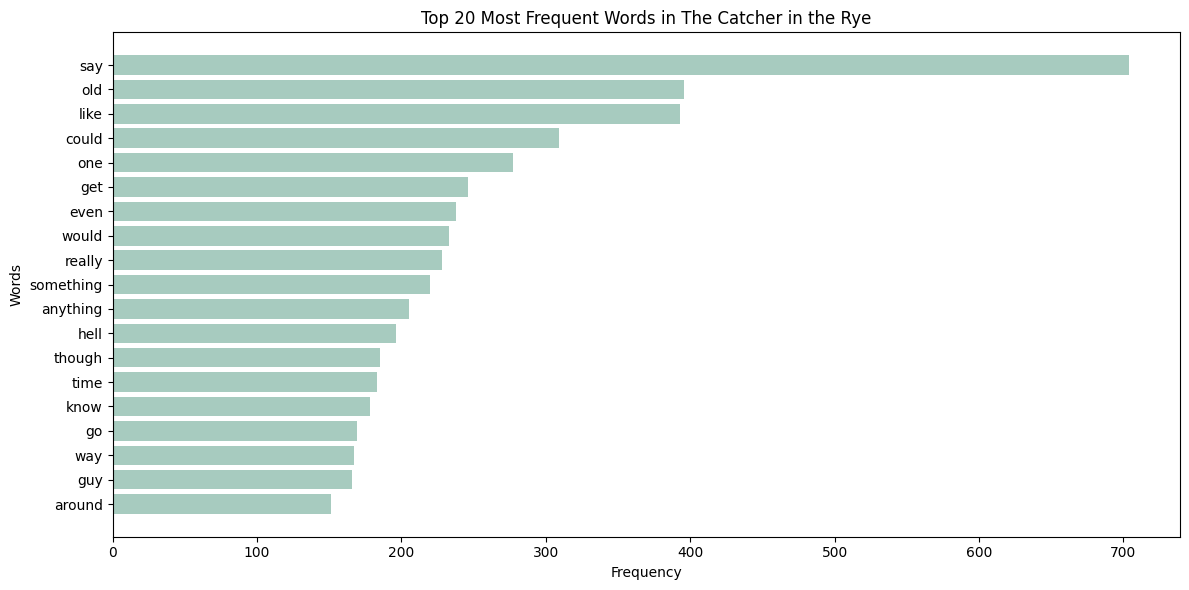

In [7]:
# Unpack words and frequencies
words = [w[0] for w, _ in most_common]
frequencies = [f for _, f in most_common]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='#A7CBBF')
plt.title("Top 20 Most Frequent Words in The Catcher in the Rye")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Top 15 Most Frequent Nouns, Verbs, Adj

In [8]:
from collections import Counter

# Create separate lists for nouns, verbs, adjectives: based on POS tags in NLTK
nouns = [word for word, pos in processed_tokens if pos.startswith('NN')]
verbs = [word for word, pos in processed_tokens if pos.startswith('VB')]
adjectives = [word for word, pos in processed_tokens if pos.startswith('JJ')]

# Count frequencies
noun_freq = Counter(nouns).most_common(15)
verb_freq = Counter(verbs).most_common(15)
adj_freq = Counter(adjectives).most_common(15)

# Print results
print("Top 15 Nouns:")
for word, freq in noun_freq:
    print(f"{word}: {freq}")
print()

print("Top 15 Verbs:")
for word, freq in verb_freq:
    print(f"{word}: {freq}")
print()

print("Top 15 Adjectives:")
for word, freq in adj_freq:
    print(f"{word}: {freq}")

Top 15 Nouns:
guy: 227
something: 220
time: 213
anything: 205
hell: 199
way: 171
thing: 156
sort: 150
goddam: 124
room: 116
phoebe: 100
somebody: 99
boy: 93
kid: 91
girl: 85

Top 15 Verbs:
say: 864
go: 563
get: 562
know: 307
think: 234
tell: 233
take: 209
come: 181
start: 171
look: 164
want: 157
give: 155
keep: 154
see: 148
make: 138

Top 15 Adjectives:
old: 401
little: 136
right: 129
good: 123
big: 111
goddam: 109
much: 91
mean: 81
whole: 78
nice: 76
next: 67
know: 62
sudden: 61
funny: 60
crazy: 60


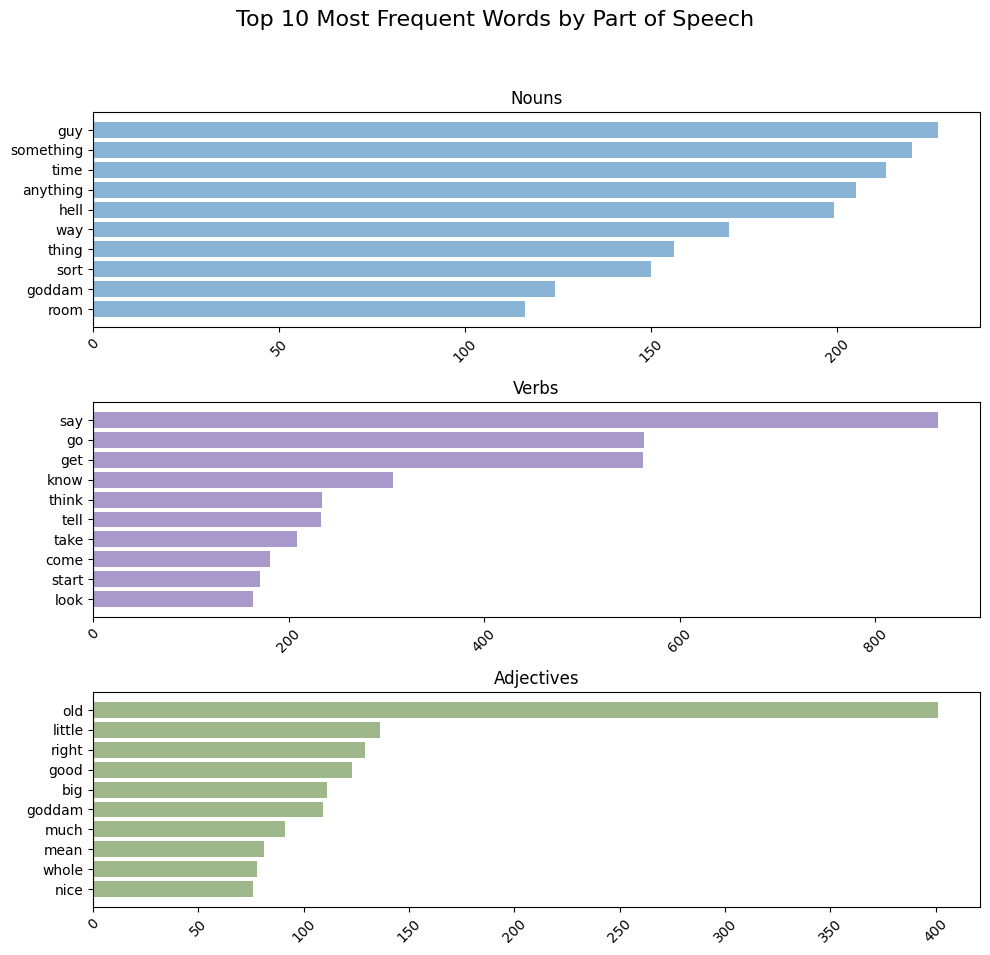

In [9]:
import matplotlib.pyplot as plt

# Take top 10 for each category
noun_top10 = noun_freq[:10]
verb_top10 = verb_freq[:10]
adj_top10 = adj_freq[:10]

# Create the figure
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("Top 10 Most Frequent Words by Part of Speech", fontsize=16)

# Nouns
axs[0].barh([w for w, _ in noun_top10], [f for _, f in noun_top10], color='#89B4D6')
axs[0].set_title("Nouns")
axs[0].tick_params(axis='x', rotation=45)
axs[0].invert_yaxis()

# Verbs
axs[1].barh([w for w, _ in verb_top10], [f for _, f in verb_top10], color='#A899CA')
axs[1].set_title("Verbs")
axs[1].tick_params(axis='x', rotation=45)
axs[1].invert_yaxis()

# Adjectives
axs[2].barh([w for w, _ in adj_top10], [f for _, f in adj_top10], color='#9FB88B')
axs[2].set_title("Adjectives")
axs[2].tick_params(axis='x', rotation=45)
axs[2].invert_yaxis()

# Show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Lemma frequencies

In [10]:
import pandas as pd
from collections import Counter

# 1. Count absolute frequencies of lemmatized tokens
absolute_freq = Counter(processed_tokens)

# 2. Calculate total number of tokens
total_tokens = sum(absolute_freq.values())

# 3. Build a DataFrame with absolute and relative frequencies
freq_df = pd.DataFrame(absolute_freq.items(), columns=["lemma", "absolute_frequency"])
freq_df["relative_frequency"] = freq_df["absolute_frequency"] / total_tokens

# 4. Sort by descending absolute frequency
freq_df = freq_df.sort_values(by="absolute_frequency", ascending=False).reset_index(drop=True)

# 5. Save to CSV file
csv_path = "lemma_frequencies.csv"
freq_df.to_csv(csv_path, index=False)

# 6. Display path for download
print(f"File saved to: {csv_path}")

from google.colab import files
files.download("lemma_frequencies.csv")

File saved to: lemma_frequencies.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TTR

In [11]:
# Number of total lemmas (tokens)
total_lemmas = len(processed_tokens)

# Number of unique lemmas (types)
unique_lemmas = len(set(processed_tokens))

# Type-Token Ratio (TTR)
ttr = unique_lemmas / total_lemmas

print(f"Total lemmas (tokens): {total_lemmas}")
print(f"Unique lemmas (types): {unique_lemmas}")
print(f"Type-Token Ratio (TTR): {ttr:.4f}")

Total lemmas (tokens): 32393
Unique lemmas (types): 5922
Type-Token Ratio (TTR): 0.1828


## Concordance list

In [12]:
tokens_only = [word for word, _ in processed_tokens]

def concordance(tokens, keyword, width=5, max_hits=25):
    hits = []
    for i, token in enumerate(tokens):
        if token == keyword:
            left = ' '.join(tokens[max(0, i - width):i])
            right = ' '.join(tokens[i + 1:i + 1 + width])
            hits.append((left, token, right))
            if len(hits) >= max_hits:
                break
    return hits

# Example: concordance for "old"
concordance_list = concordance(tokens_only, "old", width=5, max_hits=50)

# Display the results
import pandas as pd
df_concordance = pd.DataFrame(concordance_list, columns=["Left Context", "Keyword", "Right Context"])
df_concordance.style.set_properties(**{'text-align': 'left'})

,Left Context,Keyword,Right Context
0,year suppose commit suicide something,old,pencey win remember around three
1,blow nose even giggle something,old,selma thurmer headmaster daughter show
2,way reason game way say,old,spencer history teacher grippe figure
3,around midterm parent come conference,old,thurmer get ax give guy
4,start run side hill toward,old,spencer house live campus live
5,boy rang doorbell fast get,old,spencer house really frozen ear
6,almost somebody open door finally,old,spencer open maid anything always
7,way ask knew right away,old,spencer tell kick fine say
8,right room around seventy year,old,even get bang thing though
9,mean mean mean use think,old,spencer quite lot think much


In [13]:
def concordance(tokens, keyword, width=5, max_hits=25):
    hits = []
    for i, token in enumerate(tokens):
        if token == keyword:
            left = ' '.join(tokens[max(0, i - width):i])
            right = ' '.join(tokens[i + 1:i + 1 + width])
            hits.append((left, token, right))
            if len(hits) >= max_hits:
                break
    return hits

# Example: concordance for "old"
concordance_list = concordance(tokens_only, "goddam", width=5, max_hits=50)

# Display the results
import pandas as pd
df_concordance = pd.DataFrame(concordance_list, columns=["Left Context", "Keyword", "Right Context"])
df_concordance.style.set_properties(**{'text-align': 'left'})

,Left Context,Keyword,Right Context
0,hell besides go tell whole,goddam,autobiography anything tell madman stuff
1,back new york fencing team,goddam,manager fence team big deal
2,meet leave foils equipment stuff,goddam,subway fault keep get look
3,year also practically get come,goddam,checkup stuff pretty healthy though
4,anyway respectfully holden caulfield put,goddam,paper look like beaten hell
5,elkton hill surround phony come,goddam,window instance headmaster haas phony
6,make depress go crazy hat,goddam,elkton hill old spencer ask
7,stuff sheer lie even keep,goddam,equipment gym live pencey live
8,game year come school big,goddam,cadillac stand grandstand give locomotive
9,store get subway notice lose,goddam,foil cost buck way wore


In [14]:
def concordance(tokens, keyword, width=5, max_hits=25):
    hits = []
    for i, token in enumerate(tokens):
        if token == keyword:
            left = ' '.join(tokens[max(0, i - width):i])
            right = ' '.join(tokens[i + 1:i + 1 + width])
            hits.append((left, token, right))
            if len(hits) >= max_hits:
                break
    return hits

# Example: concordance for "old"
concordance_list = concordance(tokens_only, "god", width=5, max_hits=50)

# Display the results
import pandas as pd
df_concordance = pd.DataFrame(concordance_list, columns=["Left Context", "Keyword", "Right Context"])
df_concordance.style.set_properties(**{'text-align': 'left'})

,Left Context,Keyword,Right Context
0,something get right knee pray,god,tell u always pray god
1,god tell u always pray,god,talk wherever tell u ought
2,anything want think come mistake,god,sake hi say look book
3,everything get dark nut swear,god,ackley say mother darling give
4,one big stop call kid,god,damn old enough lousy father
5,game coyle perfect build basketball,god,hate stuff get bored sit
6,watch tee kind red hair,god,nice kid though use laugh
7,descriptive hell difference baseball glove,god,damn sore hell really furious
8,say hell sign saturday night,god,hat go new york say
9,play checker chrissake even answer,god,hat go new york ya


In [15]:
def concordance(tokens, keyword, width=5, max_hits=25):
    hits = []
    for i, token in enumerate(tokens):
        if token == keyword:
            left = ' '.join(tokens[max(0, i - width):i])
            right = ' '.join(tokens[i + 1:i + 1 + width])
            hits.append((left, token, right))
            if len(hits) >= max_hits:
                break
    return hits

# Example: concordance for "old"
concordance_list = concordance(tokens_only, "phoebe", width=5, max_hits=50)

# Display the results
import pandas as pd
df_concordance = pd.DataFrame(concordance_list, columns=["Left Context", "Keyword", "Right Context"])
df_concordance.style.set_properties(**{'text-align': 'left'})

,Left Context,Keyword,Right Context
0,call brother hollywood kid sister,phoebe,go bed around nine could
1,damn near give kid sister,phoebe,buzz though certainly felt like
2,would mind shoot crap old,phoebe,see never saw little kid
3,dumb one ought see old,phoebe,sort red hair little bit
4,skinny like mean tell old,phoebe,something know exactly hell talk
5,farmhouse instance run away cops,phoebe,say right loud movie right
6,miss show robert donat old,phoebe,beat hold little finger dark
7,kid name hazel weatherfield old,phoebe,spell hazle old hazle weatherfield
8,gentleman year age kill old,phoebe,swear god like smart even
9,around sunday use take old,phoebe,u wear white glove walk


## Collocations

### Bigrams

In [16]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Create a BigramCollocationFinder from lemmatized tokens
bigram_finder = BigramCollocationFinder.from_words(tokens_only)

# Optionally filter out rare bigrams (appearing less than 2 times)
bigram_finder.apply_freq_filter(2)

# Get the 20 most frequent bigrams
most_common_bigrams = bigram_finder.ngram_fd.most_common(20)

# Display the result
for bigram, freq in most_common_bigrams:
    print(f"{bigram[0]} {bigram[1]}: {freq}")

old phoebe: 69
could tell: 48
feel like: 42
want know: 32
new york: 32
little kid: 31
old sally: 31
could see: 30
go back: 30
damn near: 29
go home: 28
one thing: 28
say say: 28
god sake: 28
felt like: 27
say anything: 27
gon na: 27
look like: 26
old spencer: 25
could get: 25


In [17]:
all_bigrams = bigram_finder.ngram_fd.items()

# Filter with "old" as a first word
old_first_bigrams = [(bigram, freq) for bigram, freq in all_bigrams if bigram[0] == "old"]

# Filter freq.
old_first_bigrams = sorted(old_first_bigrams, key=lambda x: x[1], reverse=True)

for bigram, freq in old_first_bigrams:
    print(f"{bigram[0]} {bigram[1]}: {freq}")

old phoebe: 69
old sally: 31
old spencer: 25
old stradlater: 17
old jane: 16
old luce: 16
old maurice: 11
old guy: 10
old ackley: 10
old ernie: 8
old thurmer: 7
old antolini: 7
old sunny: 6
old marty: 5
old lillian: 5
old lady: 4
old ossenburger: 3
old peak: 3
old enough: 3
old morrow: 3
old horwitz: 3
old bag: 3
old child: 3
old straw: 3
old couple: 3
old valencia: 3
old pencey: 2
old hell: 2
old bathrobe: 2
old bull: 2
old haas: 2
old marsalla: 2
old hunting: 2
old allie: 2
old crap: 2
old man: 2
old eye: 2
old bernice: 2
old anyways: 2
old could: 2
old eustacia: 2
old mercutio: 2
old ophelia: 2
old carl: 2
old brother: 2
old alec: 2
old marcia: 2
old tina: 2
old james: 2


### Trigrams

In [18]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

# Create a TrigramCollocationFinder from lemmatized tokens
trigram_finder = TrigramCollocationFinder.from_words(tokens_only)

# Optional: apply lower frequency filter
trigram_finder.apply_freq_filter(1)

# Get the top 20 most frequent trigrams
most_common_trigrams = trigram_finder.ngram_fd.most_common(20)

# Display the trigrams
for trigram, freq in most_common_trigrams:
    print(f"{' '.join(trigram)}: {freq}")

want know truth: 23
old phoebe say: 17
feel much like: 9
give old jane: 8
old sally say: 8
go back room: 7
go back school: 7
live new york: 6
get ta get: 6
old jane buzz: 6
see old phoebe: 6
go new york: 5
old spencer say: 5
put hand shoulder: 5
red hunting hat: 5
walk around room: 5
say feel like: 5
ed banky car: 5
tiny little kid: 5
tell go home: 5


## Wordcloud

In [19]:
!pip install wordcloud

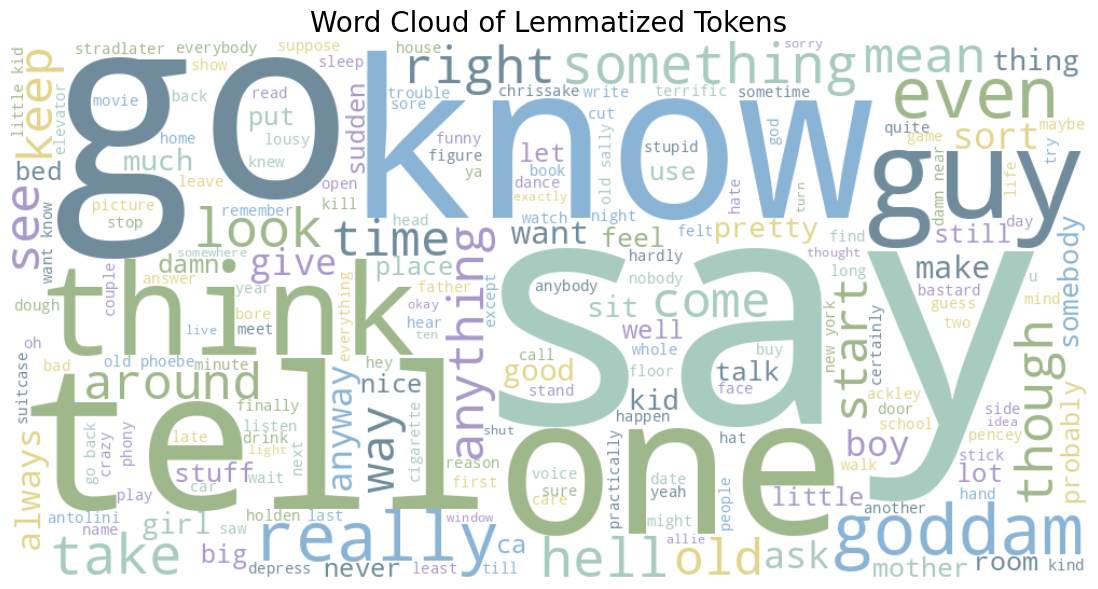

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

colors = ['#A899CA', '#9FB88B', '#89B4D6', '#A7CBBF', '#E2D58B', '#708C9C']

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

# Combine tokens back into a single string
text_for_cloud = ' '.join(tokens_only)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_for_cloud)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud.recolor(color_func=custom_color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Lemmatized Tokens", fontsize=20)
plt.show()

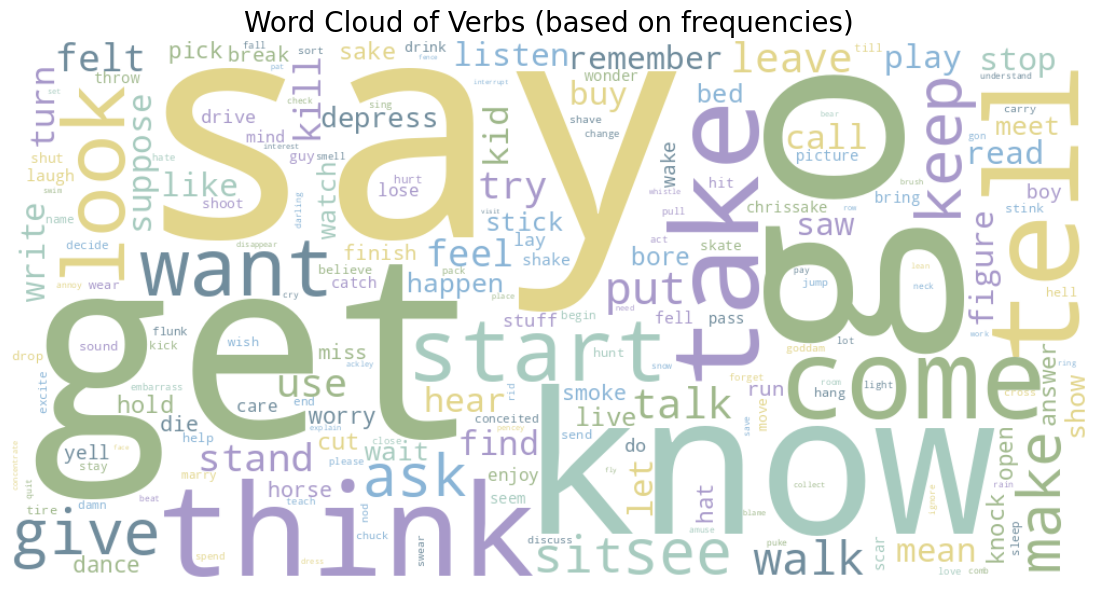

In [21]:
from wordcloud import WordCloud

# Используем Counter только для глаголов
verb_counter = Counter(verbs)

# Создаём облако по частотам
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(verb_counter)

# Визуализация
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud.recolor(color_func=custom_color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Verbs (based on frequencies)", fontsize=20)
plt.show()

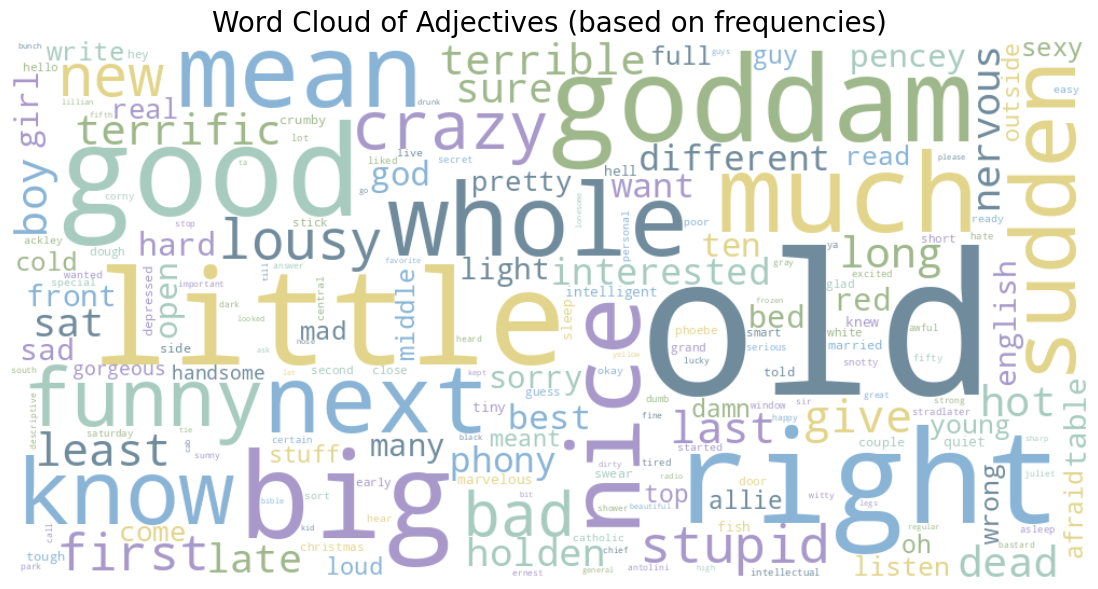

In [22]:
from wordcloud import WordCloud

# Используем Counter только для глаголов
adj_counter = Counter(adjectives)

# Создаём облако по частотам
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(adj_counter)

# Визуализация
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud.recolor(color_func=custom_color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Adjectives (based on frequencies)", fontsize=20)
plt.show()

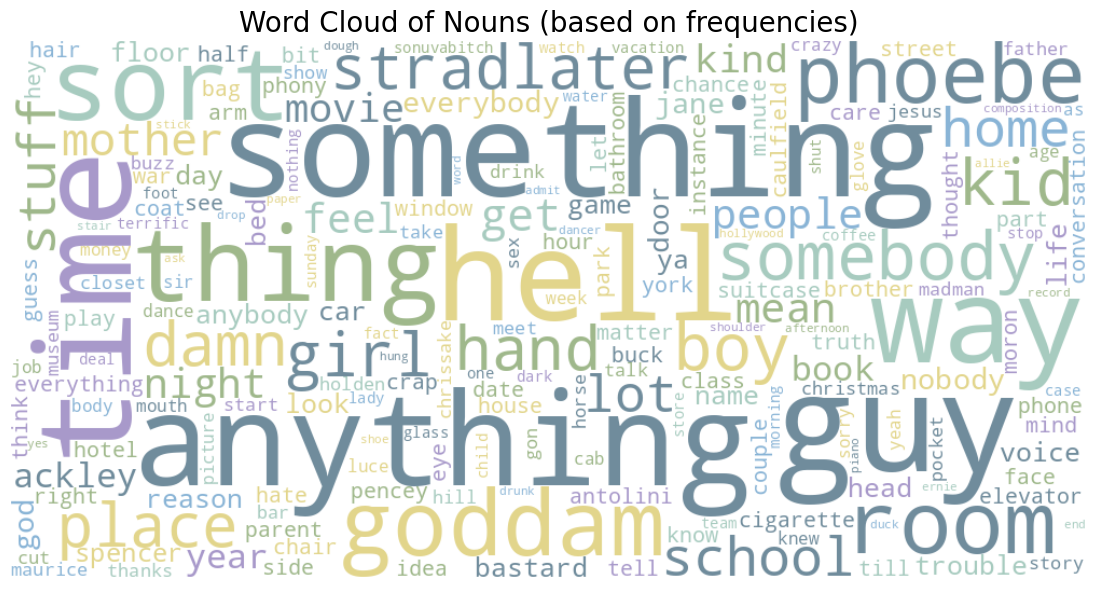

In [23]:
from wordcloud import WordCloud

# Используем Counter только для глаголов
noun_counter = Counter(nouns)

# Создаём облако по частотам
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(noun_counter)

# Визуализация
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud.recolor(color_func=custom_color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Nouns (based on frequencies)", fontsize=20)
plt.show()

## Spacy

In [24]:
!pip install -U spacy
import spacy

# Download the English model
!python -m spacy download en_core_web_sm

# Load the model
nlp = spacy.load("en_core_web_sm")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Entities

In [25]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Apply NLP to your cleaned text
doc = nlp(text_clean)

# Extract all named entities as (text, label)
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Count entities by type
from collections import Counter
entity_counts = Counter([label for _, label in entities])

# Print summary
print("Named Entities by Type:")
for label, count in entity_counts.most_common():
    print(f"{label}: {count}")

Named Entities by Type:
PERSON: 865
CARDINAL: 351
GPE: 298
DATE: 220
ORG: 207
TIME: 120
ORDINAL: 76
NORP: 70
WORK_OF_ART: 59
FAC: 32
MONEY: 29
LOC: 26
LANGUAGE: 21
QUANTITY: 14
PRODUCT: 11
EVENT: 3


### Locations

In [26]:
# Extract locations: GPE = countries/cities, LOC = general locations
locations = [ent.text for ent in doc.ents if ent.label_ in ("GPE", "LOC")]

# Count and display the 20 most frequent
from collections import Counter
import pandas as pd

location_counts = Counter(locations).most_common(20)
location_df = pd.DataFrame(location_counts, columns=["Location", "Frequency"])
location_df

,Location,Frequency
0,Phoebe,76
1,Pencey,58
2,New York,29
3,Hollywood,13
4,Elkton Hills,13
5,Whooton,8
6,Central Park South,4
7,Maine,4
8,Seattle,4
9,Africa,3


In [27]:
# Misclassified items
location_df = location_df[~location_df["Location"].str.lower().isin(["phoebe"])]
location_df

,Location,Frequency
1,Pencey,58
2,New York,29
3,Hollywood,13
4,Elkton Hills,13
5,Whooton,8
6,Central Park South,4
7,Maine,4
8,Seattle,4
9,Africa,3
10,Central Park,3


### Persons

In [28]:
persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
from collections import Counter
import pandas as pd
person_counts = Counter(persons).most_common()
person_df = pd.DataFrame(person_counts, columns=["Name", "Frequency"])

In [29]:
# See most common person names
person_counts = Counter(persons).most_common(20)
person_df = pd.DataFrame(person_counts, columns=["Name", "Frequency"])
person_df

,Name,Frequency
0,Stradlater,90
1,Antolini,49
2,Sally,45
3,Jane,43
4,Allie,38
5,Ackley,37
6,Spencer,30
7,Phoebe,25
8,Maurice,20
9,Holden,17


## Networks

In [30]:
!pip install networkx matplotlib

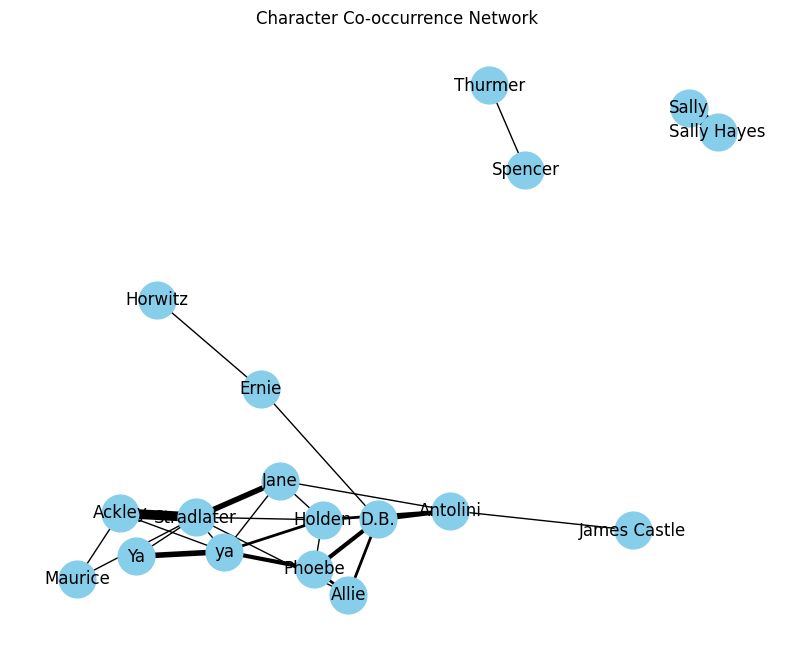

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

# Extract all sentences from the processed document
sentences = list(doc.sents)

# Define your list of character names (from person_df, or manually)
character_names = list(person_df["Name"].unique())

# Initialize edge dictionary
edges = defaultdict(int)

# Count co-occurrences: characters appearing in the same sentence
for sent in sentences:
    sent_text = sent.text
    present_characters = [name for name in character_names if name in sent_text]
    if len(present_characters) > 1:
        for pair in combinations(sorted(present_characters), 2):
            edges[pair] += 1

# Create a graph
G = nx.Graph()
for (char1, char2), weight in edges.items():
    G.add_edge(char1, char2, weight=weight)

# Plot the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Character Co-occurrence Network")
plt.axis("off")
plt.show()

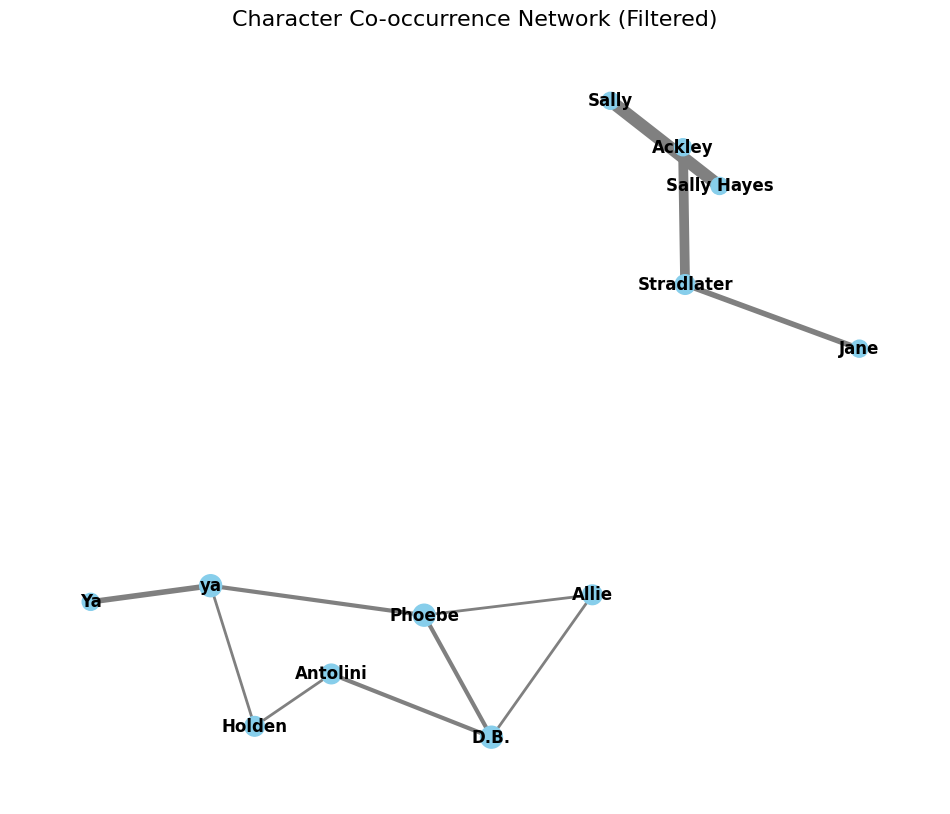

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

# 1. Подготовка
sentences = list(doc.sents)
character_names = list(person_df["Name"].unique())

# 2. Подсчет совместных появлений
edges = defaultdict(int)
for sent in sentences:
    sent_text = sent.text
    present_characters = [name for name in character_names if name in sent_text]
    if len(present_characters) > 1:
        for pair in combinations(sorted(present_characters), 2):
            edges[pair] += 1

# 3. Построение графа с фильтром
G = nx.Graph()
threshold = 2
for (char1, char2), weight in edges.items():
    if weight >= threshold:
        G.add_edge(char1, char2, weight=weight)

# 4. Визуализация
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=1.2, seed=42)

node_sizes = [100 + 50 * G.degree(n) for n in G.nodes()]
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Character Co-occurrence Network (Filtered)", fontsize=16)
plt.axis("off")
plt.show()

## Sentiment

In [35]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze overall sentiment of the whole novel
scores = sia.polarity_scores(text_clean)

# Display results
print("Overall sentiment of the novel:")
for k, v in scores.items():
    print(f"{k.capitalize()}: {v}")

Overall sentiment of the novel:
Neg: 0.119
Neu: 0.778
Pos: 0.103
Compound: -1.0


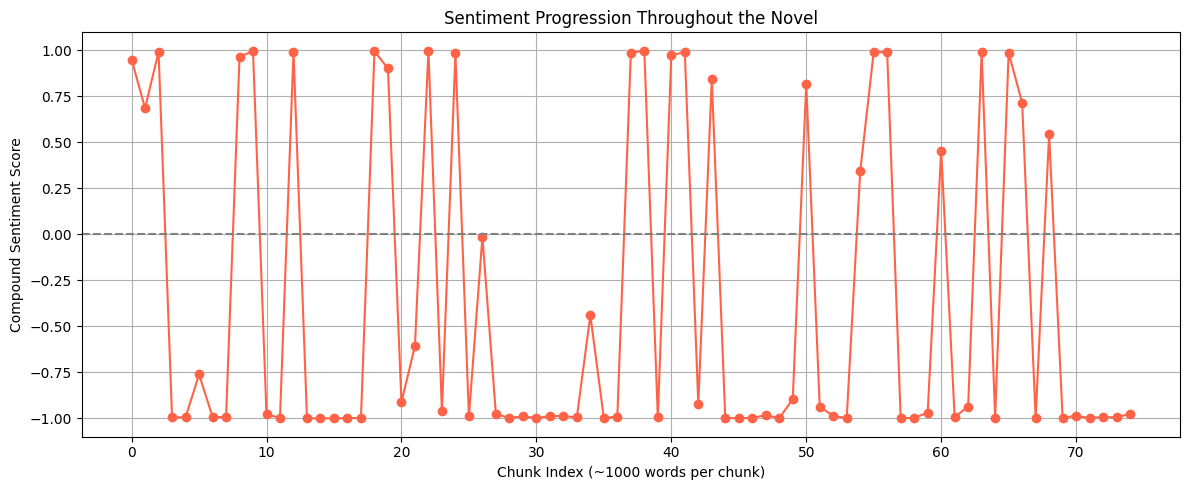

In [39]:
# Split text into chunks of ~1000 tokens
words = text_clean.split()
chunk_size = 1000
chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

# Analyze sentiment of each chunk
sentiments = [sia.polarity_scores(chunk)['compound'] for chunk in chunks]

# Plot sentiment over time
plt.figure(figsize=(12, 5))
plt.plot(range(len(sentiments)), sentiments, marker='o', linestyle='-', color='tomato')
plt.title("Sentiment Progression Throughout the Novel")
plt.xlabel("Chunk Index (~1000 words per chunk)")
plt.ylabel("Compound Sentiment Score")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
import numpy as np

# Convert to array
sentiment_array = np.array(sentiments)

# Most positive and most negative sections
top_positive_indices = sentiment_array.argsort()[-3:][::-1]
top_negative_indices = sentiment_array.argsort()[:3]

key_moments = {
    "Most Positive": [(i, sentiment_array[i]) for i in top_positive_indices],
    "Most Negative": [(i, sentiment_array[i]) for i in top_negative_indices]
}

# Show results
key_moments

{'Most Positive': [(np.int64(15), np.float64(0.9989)),
  (np.int64(9), np.float64(0.998)),
  (np.int64(22), np.float64(0.997))],
 'Most Negative': [(np.int64(5), np.float64(-0.9999)),
  (np.int64(6), np.float64(-0.9998)),
  (np.int64(18), np.float64(-0.9998))]}

In [42]:
# Extract text of top 3 positive and top 3 negative chunks
print("=== MOST POSITIVE MOMENTS ===\n")
for i in top_positive_indices:
    print(f"Chunk {i} (Sentiment Score: {sentiment_array[i]:.3f}):\n")
    print(chunks[i][:1000] + "...\n")
    print("-" * 80)

print("\n=== MOST NEGATIVE MOMENTS ===\n")
for i in top_negative_indices:
    print(f"Chunk {i} (Sentiment Score: {sentiment_array[i]:.3f}):\n")
    print(chunks[i][:1000] + "...\n")
    print("-" * 80)

=== MOST POSITIVE MOMENTS ===

Chunk 15 (Sentiment Score: 0.999):

wasn't kidding any more. The thing is, it's really hard to be roommates with people if your suitcases are much better than theirs - if yours are really good ones and theirs aren't. You think if they're intelligent and all, the other person, and have a good sense of humor, that they don't give a damn whose suitcases are better, but they do. They really do. It's one of the reasons why I roomed with a stupid bastard like Stradlater. At least his suitcases were as good as mine. Anyway, these two nuns were sitting next to me, and we sort of struck up a conversation. The one right next to me had one of those straw baskets that you see nuns and Salvation Army babes collecting dough with around Christmas time. You see them standing on corners, especially on Fifth Avenue, in front of the big department stores and all. Anyway, the one next to me dropped hers on the floor and I reached down and picked it up for her. I asked her if

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean

# Инициализируем анализатор
sia = SentimentIntensityAnalyzer()

# 1. Разделим на предложения
sentences = list(doc.sents)  # doc — результат работы nlp(text_clean)

# 2. Отберём предложения, где упоминается Phoebe
phoebe_sentences = [sent.text for sent in sentences if "Phoebe" in sent.text]

# 3. Получим оценку тональности для каждого предложения
phoebe_scores = [sia.polarity_scores(sent) for sent in phoebe_sentences]

# 4. Посчитаем средние значения
avg_neg = mean(score["neg"] for score in phoebe_scores)
avg_neu = mean(score["neu"] for score in phoebe_scores)
avg_pos = mean(score["pos"] for score in phoebe_scores)
avg_compound = mean(score["compound"] for score in phoebe_scores)

# 5. Выводим результат
print("Sentiment around 'Phoebe':")
print(f"Average Negative: {avg_neg:.3f}")
print(f"Average Neutral:  {avg_neu:.3f}")
print(f"Average Positive: {avg_pos:.3f}")
print(f"Average Compound: {avg_compound:.3f}")

Sentiment around 'Phoebe':
Average Negative: 0.056
Average Neutral:  0.904
Average Positive: 0.040
Average Compound: -0.055


In [48]:
# Read the cleaned text file
with open("Rye_clean.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Remove newlines and keep track of cleaned lines
cleaned_lines = [line.strip() for line in lines]

# Store indices where we find a chapter heading (e.g., "1", "2", "3"...); we
# initialize the list to contain a `0` because the first character in our text
# is actually a chapter number, BUT the following algorythm counts as chapter
# numbers only "lines that contain only a number and are surrounded by blank
# lines" (see below). We also keep the strings that denote chapter numbers, to
# check that everything is correct, and insert "1" in the list for the same
# reason explained before.
chapter_indices = [0]
chapter_numbers = ["1"]

for i, line in enumerate(cleaned_lines):
    # Look for lines that contain only a number and are surrounded by blank
    # lines
    if line.isdigit():
        if i > 0 and i < len(cleaned_lines) - 1:
            if cleaned_lines[i - 1] == "" and cleaned_lines[i + 1] == "":
                chapter_indices.append(i)
                chapter_numbers.append(line)

# Print how many chapters we found, and the chapter numbers just to be sure
print("Total chapters found:", len(chapter_indices))
print("Found Chapters:", ", ".join(chapter_numbers))

# Now split the text into chapters: we rebuild the text from the cleaned lines
# so that they do not contain either leading or trailing spaces
chapters = []
for i in range(len(chapter_indices)):
    start = chapter_indices[i]
    end = chapter_indices[i + 1] if i + 1 < len(chapter_indices) else len(cleaned_lines)
    chapter_text = "\n".join(cleaned_lines[start:end]).strip()
    chapters.append(chapter_text)

# Let's print the first few lines of the first chapter as a check
print("\n--- First chapter preview ---\n")
print(chapters[0][:1000])  # first 1000 characters of chapter 1

Total chapters found: 26
Found Chapters: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26

--- First chapter preview ---

1

If you really want to hear about it, the first thing you'll probably want to know is

where I was born, an what my lousy childhood was like, and how my parents were

occupied and all before they had me, and all that David Copperfield kind of crap, but I

don't feel like going into it, if you want to know the truth. In the first place, that stuff

bores me, and in the second place, my parents would have about two hemorrhages apiece

if I told anything pretty personal about them. They're quite touchy about anything like

that, especially my father. They're nice and all - I'm not saying that - but they're also

touchy as hell. Besides, I'm not going to tell you my whole goddam autobiography or

anything. I'll just tell you about this madman stuff that happened to me around last

Christmas just before I got pretty run-down

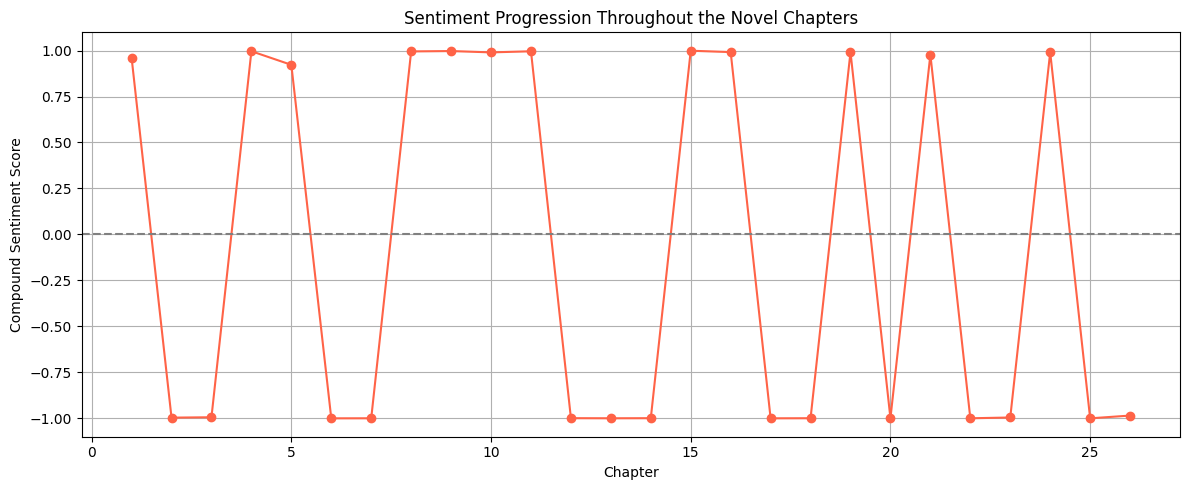

In [49]:
# Analyze sentiment of each chapter
sentiments = [sia.polarity_scores(chapter)['compound'] for chapter in chapters]

# Plot sentiment over time
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(sentiments) + 1), sentiments, marker='o', linestyle='-', color='tomato')
plt.title("Sentiment Progression Throughout the Novel Chapters")
plt.xlabel("Chapter")
plt.ylabel("Compound Sentiment Score")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

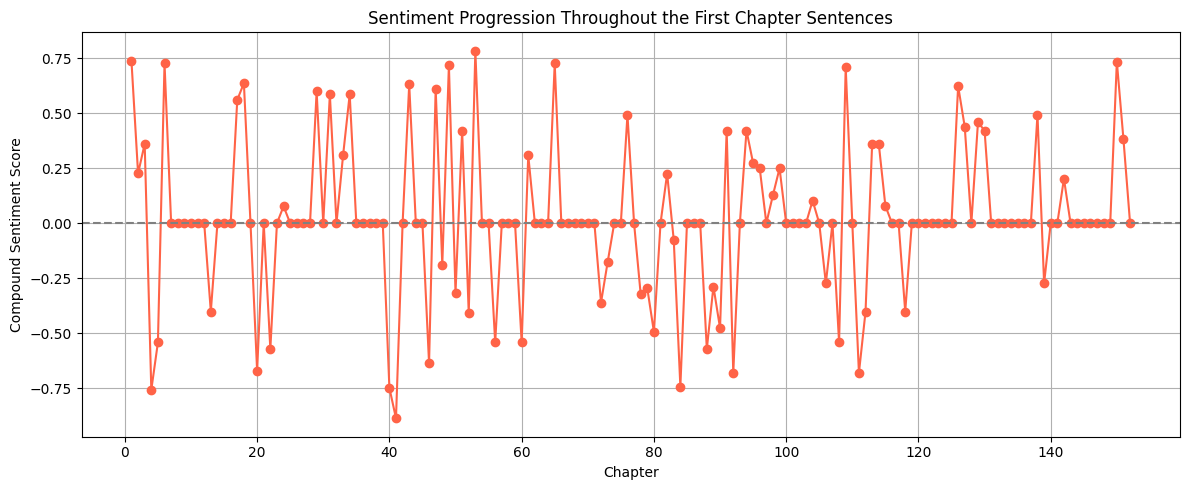

In [50]:
# First extract exact sentences: we convert all spaces to a single space,
# including newlines, to avoid fooling the natural language processor.
text = " ".join(chapters[0].split())
doc_first_chapter = nlp(text)
sentences = list(str(x) for x in doc_first_chapter.sents)

# Analyze sentiment of each sentence
sentiments = [sia.polarity_scores(s)['compound'] for s in sentences]

# Plot sentiment over time
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(sentiments) + 1), sentiments, marker='o', linestyle='-', color='tomato')
plt.title("Sentiment Progression Throughout the First Chapter Sentences")
plt.xlabel("Chapter")
plt.ylabel("Compound Sentiment Score")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

### First-person vs third-person pronouns

In [53]:
# Tokenize the original cleaned text (not the lemmatized version)
import re
tokens = re.findall(r'\b\w+\b', text_clean.lower())

# Define pronoun lists
first_person = ['i', 'me', 'my', 'mine', 'myself']
third_person = ['he', 'him', 'his', 'she', 'her', 'they', 'them', 'their', 'theirs', 'himself', 'herself', 'themselves']

# Count frequencies
token_counts = Counter(tokens)
fp_count = sum(token_counts[p] for p in first_person)
tp_count = sum(token_counts[p] for p in third_person)

# Print results
print(f"First person pronouns: {fp_count}")
print(f"Third person pronouns: {tp_count}")

First person pronouns: 5589
Third person pronouns: 4405


### Cognitive/emotional verbs (on lemmatized tokens)

In [55]:
# Define a basic list of cognitive/emotional verbs
cognitive_verbs = ['think', 'feel', 'guess', 'wonder', 'believe', 'know', 'remember', 'wish', 'realize']

# Count them in processed_tokens (lemmatized)
cog_verb_counts = Counter([w for w in tokens_only if w in cognitive_verbs])

# Show results
print("Cognitive/Emotional Verbs:")
for verb, freq in cog_verb_counts.most_common():
    print(f"{verb}: {freq}")

Cognitive/Emotional Verbs:
know: 402
think: 257
feel: 117
remember: 40
guess: 32
wish: 16
wonder: 15
believe: 13
realize: 7


### Past tense vs present tense

In [57]:
from nltk import pos_tag

# POS tagging on lemmatized tokens
tagged = pos_tag(tokens_only)

# Count past tense verbs (VBD) and present tense verbs (VBP, VBZ)
past_verbs = [word for word, tag in tagged if tag == 'VBD']
present_verbs = [word for word, tag in tagged if tag in ['VBP', 'VBZ']]

# Results
print(f"Past tense verbs: {len(past_verbs)}")
print(f"Present tense verbs: {len(present_verbs)}")

Past tense verbs: 504
Present tense verbs: 3171


### Divide tokens into parts

In [58]:
# Divide tokens into three parts: Beginning, Middle, End
third = len(tokens_only) // 3
sections = {
    "Beginning": tokens_only[:third],
    "Middle": tokens_only[third:2*third],
    "End": tokens_only[2*third:]
}

# Initialize statistics for TTR and POS
ttr_stats = {}
pos_stats = {}
past_verbs_count = {}
present_verbs_count = {}

# Perform calculations for each section
for label, tokens in sections.items():
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))

    # Calculate Type-Token Ratio (TTR)
    ttr = unique_tokens / total_tokens if total_tokens > 0 else 0
    ttr_stats[label] = ttr

    # POS tagging (Part of Speech)
    tagged_tokens = pos_tag(tokens)
    pos_counts = Counter(tag[:2] for _, tag in tagged_tokens)
    normalized_pos = {tag: count / total_tokens for tag, count in pos_counts.items()} if total_tokens > 0 else {}

    pos_stats[label] = normalized_pos

    # Count past and present tense verbs
    past_verbs_count[label] = len([word for word, tag in tagged_tokens if tag == 'VBD'])
    present_verbs_count[label] = len([word for word, tag in tagged_tokens if tag in ['VBP', 'VBZ']])

# Create DataFrames for TTR and POS stats
ttr_df = pd.DataFrame.from_dict(ttr_stats, orient='index', columns=["TTR"])
pos_df = pd.DataFrame(pos_stats).fillna(0).T

# Merge DataFrames with verb counts
verb_comparison_df = pd.DataFrame({
    "Past Tense Verbs": past_verbs_count,
    "Present Tense Verbs": present_verbs_count
})

# Combine all results into one DataFrame
final_df = pd.concat([ttr_df, pos_df, verb_comparison_df], axis=1)

# Show the combined DataFrame
final_df.head()  # Display first few rows of the dataframe

,TTR,RB,VB,NN,JJ,IN,MD,CD,DT,CC,RP,PR,FW,WR,UH,WD,WP,TO,Past Tense Verbs,Present Tense Verbs
Beginning,0.167917,0.102065,0.192553,0.418727,0.205150,0.037510,0.019542,0.012967,0.002593,0.000834,0.001760,0.000556,0.000741,0.000278,0.001019,0.000093,0.002686,0.000926,174,1046
Middle,0.164583,0.103084,0.200426,0.412429,0.197647,0.036862,0.022691,0.018431,0.003056,0.000278,0.001760,0.000185,0.001019,0.000093,0.000278,0.000278,0.001019,0.000463,149,1045
End,0.157607,0.096953,0.215298,0.405315,0.194740,0.036207,0.026114,0.013983,0.002685,0.000648,0.002778,0.000370,0.000741,0.000185,0.001204,0.000185,0.001204,0.001389,181,1079


## Topic Modeling

In [59]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [60]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Use default stopwords or custom input from the sidebar
from nltk.corpus import stopwords
nltk.download('stopwords')

# Vectorizer model to transform the text
vectorizer_model = CountVectorizer(stop_words=stopwords.words('english'))

# Initialize the BERTopic model
topic_model = BERTopic(
    top_n_words=10,
    calculate_probabilities=True,
    verbose=True,
    vectorizer_model=vectorizer_model,
    min_topic_size=3,
    nr_topics=10, # Define the number of topics you want to extract
)


# First extract exact sentences: we convert all spaces to a single space,
# including newlines, to avoid fooling the natural language processor.
text = " ".join(text_clean.split())
doc = nlp(text)

# Extract sentences from the processed text
sentences = list(str(x) for x in doc.sents)

# Fit BERTopic to the text
topics, probs = topic_model.fit_transform(sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-05-25 16:10:27,884 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/222 [00:00<?, ?it/s]

2025-05-25 16:11:45,014 - BERTopic - Embedding - Completed ✓
2025-05-25 16:11:45,016 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-25 16:12:30,190 - BERTopic - Dimensionality - Completed ✓
2025-05-25 16:12:30,194 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-25 16:15:55,504 - BERTopic - Cluster - Completed ✓
2025-05-25 16:15:55,505 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-25 16:15:56,072 - BERTopic - Representation - Completed ✓
2025-05-25 16:15:56,073 - BERTopic - Topic reduction - Reducing number of topics
2025-05-25 16:15:56,122 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-25 16:15:56,232 - BERTopic - Representation - Completed ✓
2025-05-25 16:15:56,235 - BERTopic - Topic reduction - Reduced number of topics from 554 to 10


In [61]:
topic_model.get_topic_info() # Get topic information

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1880,-1_said_didnt_like_get,"[said, didnt, like, get, dont, one, know, some...","[Anyway, one time when she went to the ladies'..."
1,0,4854,0_said_old_didnt_like,"[said, old, didnt, like, know, got, dont, godd...","[she said., ""What?"" she said., ""What'd you do?..."
2,1,130,1_york_new_ducks_museum,"[york, new, ducks, museum, fish, go, right, so...","[I live in New York, and I was thinking about ..."
3,2,81,2_never_guys_mean_girls,"[never, guys, mean, girls, dont, theyre, like,...","[I mean the other guys and myself., And mean g..."
4,3,71,3_jesus_catholic_nuns_disciples,"[jesus, catholic, nuns, disciples, egyptians, ...",[That's why I was glad those two nuns didn't a...
5,4,27,4_many_14_11_13,"[many, 14, 11, 13, 10, 23, 16, 21, 22, failing]","[And how many are you failing in?"", If that ma..."
6,5,19,5_sunday_wednesday_radio_open,"[sunday, wednesday, radio, open, today, music,...",[I figured I'd buy it in some store that was o...
7,6,18,6_yellow_smell_partly_teeth,"[yellow, smell, partly, teeth, yellowness, im,...","[What you should be is not yellow at all., May..."
8,7,15,7_science_size_mind_scientist,"[science, size, mind, scientist, begin, modern...","[After a while, you'll have an idea what kind ..."
9,8,8,8_cancer_hormones_article_figured,"[cancer, hormones, article, figured, heal, des...",[I looked exactly like the guy in the article ...


In [62]:
# Visualize the topics [fig1]
topic_model.visualize_barchart(top_n_topics=10)

### Hierarchical Clustering

In [63]:
topic_model.visualize_hierarchy(top_n_topics=10)

### Similarity Matrix

In [64]:
topic_model.visualize_heatmap(top_n_topics=10)

### Intertopic Distance Map

In [65]:
topic_model.visualize_topics(top_n_topics=10)